# Data Merging Basics

## One-to-One Relationships

### Merging Census data with Chicago local gov data

The city of Chicago is divided into fifty local neighborhoods called wards. We have a table with data about the local government offices in each ward. 

- In this example, we will merge the local government data with census data about the population of each ward.

In [2]:
import pandas as pd

In [9]:
wards = pd.read_pickle("../data/pandas_datasets/pandas-joins/ward.p")
wards.head(10)

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649
5,6,Roderick T. Sawyer,8001 S. MARTIN LUTHER KING DRIVE,60619
6,7,Gregory I. Mitchell,2249 EAST 95TH STREET,60617
7,8,Michelle A. Harris,8539 SOUTH COTTAGE GROVE AVENUE,60619
8,9,Anthony A. Beale,34 EAST 112TH PLACE,60628
9,10,Susan Sadlowski Garza,10500 SOUTH EWING AVENUE,60617


In [10]:
wards.shape

(50, 4)

We have information about the local government of each ward, such as the government office address. This table has 50 rows and 4 columns

In [12]:
census = pd.read_pickle("../data/pandas_datasets/pandas-joins/census.p")
census.head(10)

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637
5,6,54989,52341,-5%,150 WEST 74TH STREET,60636
6,7,54593,51581,-6%,8549 SOUTH OGLESBY AVENUE,60617
7,8,54039,51687,-4%,1346-1352 EAST 75TH STREET,60649
8,9,52008,51519,-1%,11039-11059 SOUTH WENTWORTH AVENUE,60628
9,10,56613,51535,-9%,10534 SOUTH AVENUE F,46394


In [13]:
census.shape

(50, 6)

The census table contains the population of each ward in 2000 and 2010, and that change as a percentage. Additionally, it includes the address for the center of each ward. This table has 50 rows and 6 columns.

The two tables are related by their ward column. We can merge them together, matching the ward number from each row of the wards table to the ward numbers from the census table. For example, the second ward in the wards table with Alderman Brian Hopkins would be matched with row 2 of the census table where the population in 2000 was 54,361.

***Inner Join***

- The pandas package has an excellent DataFrame method for performing this type of merge called merge. The merge method takes the first DataFrame, wards, and merges it with the second DataFrame, census. We use the on argument to tell the method that we want to merge the two DataFrames on the ward column. 

- Since we listed the wards table first, its columns will appear first in the output, followed by the columns from the census table. In this example, the merge returns a DataFrame with 50 rows and 9 columns, where the returned rows have matching values for the ward column in both tables. This is called an **inner join**.

<img src="../img/inner-join.jpg" width="400" height="300">

In [16]:
wards_census = wards.merge(census, on="ward")
wards_census.head(5)

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


An inner join will only return rows that have matching values in both tables.

In [17]:
print(wards_census.columns)

Index(['ward', 'alderman', 'address_x', 'zip_x', 'pop_2000', 'pop_2010',
       'change', 'address_y', 'zip_y'],
      dtype='object')


The merged table has columns with suffixes of underscore x or y. This is because both the wards and census tables contained address and zip columns. To avoid multiple columns with the same name, they are automatically given a suffix by the merge method.

In [18]:
wards_census = wards.merge(census, on="ward", suffixes=("_ward", "_cen"))
wards_census.head(5)

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


We can use the suffix argument of the merge method to control this behavior. We provide a tuple where all of the overlapping columns in the left table are given the suffix '_ward', and those of the right table will be given the suffix '_cen'. This makes it easier for us to tell the difference between the columns.

### Taxicab owners and vehicle info data

Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. 

- We'll merge two tables together. One table is called taxi_owners, with info about the taxi cab company owners, and one is called taxi_veh, with info about each taxi cab vehicle

#### 1. Let's figure out what the most popular types of fuel used in Chicago taxis are.

In [19]:
taxi_owners = pd.read_pickle("../data/pandas_datasets/pandas-joins/taxi_owners.p")
taxi_vehicles = pd.read_pickle("../data/pandas_datasets/pandas-joins/taxi_vehicles.p")

In [20]:
taxi_owners.head(5)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [21]:
taxi_owners.shape

(3519, 5)

In [22]:
taxi_vehicles.head(5)

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [23]:
taxi_vehicles.shape

(3519, 6)

In [24]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


## One-to-Many relationships

Let's explore one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table and find out what is the most common business owner title. (i.e., secretary, CEO, or vice president).

In [25]:
licenses = pd.read_pickle("../data/pandas_datasets/pandas-joins/licenses.p")
biz_owners = pd.read_pickle("../data/pandas_datasets/pandas-joins/business_owners.p")

In [26]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on="account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values(by="account", ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## Merging Multiple Data Frames

Determine the total number of rides provided to passengers passing through the Wilson station `(station_name == 'Wilson')` on weekdays `(day_type == 'Weekday')` in July `(month == 7)` using Chicago's public transportation data. The data is available in three separate tables that need to be merged to obtain the required insights. The `cal`, `ridership`, and `stations` DataFrames have been loaded, and their relationships are shown in the diagram below.

<img src="../img/cta_ridership.jpg" width="400">

In [27]:
ridership = pd.read_pickle("../data/pandas_datasets/pandas-joins/cta_ridership.p")
ridership

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719
...,...,...,...,...,...
3280,41660,2019,12,27,13898
3281,41660,2019,12,28,9485
3282,41660,2019,12,29,7581
3283,41660,2019,12,30,15332


In [28]:
cal = pd.read_pickle("../data/pandas_datasets/pandas-joins/cta_calendar.p")
cal

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday
...,...,...,...,...
360,2019,12,27,Weekday
361,2019,12,28,Saturday
362,2019,12,29,Sunday/Holiday
363,2019,12,30,Weekday


In [29]:
stations = pd.read_pickle("../data/pandas_datasets/pandas-joins/stations.p")
stations

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"
...,...,...,...
139,41660,Lake/State,"(41.884809, -87.627813)"
140,41670,Conservatory,"(41.884904, -87.716523)"
141,41680,Oakton-Skokie,"(42.02624348, -87.74722084)"
142,41690,Cermak-McCormick Place,"(41.853115, -87.626402)"


In [30]:
# Total riders in a month
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

In [31]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

In [32]:
# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


Wilson station had 140,005 riders during weekdays in July.

In [36]:
zip_demo = pd.read_pickle("../data/pandas_datasets/pandas-joins/zip_demo.p")
zip_demo

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226
...,...,...
61,53045,100438
62,60076,74964
63,60126,103454
64,60458,47411


In [37]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on="zip") \
							.merge(wards, on="ward")


# Print the results by alderman and show median income
print(licenses_zip_ward.groupby("alderman").agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

We see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

## One-to-many merge with multiple tables

Identifying an optimal location in Chicago for a goat-based lawn mowing business. The ideal location should have ample space and a low density of businesses and residents to minimize potential complaints. To determine the best area, three tables will be merged to analyze space availability and population distribution.

In [39]:
land_use = pd.read_pickle("../data/pandas_datasets/pandas-joins/land_use.p")
land_use.head(2)

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50


In [40]:
licenses.head(2)

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633


In [41]:
census.head(2)

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622


In [43]:

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

In [44]:
land_cen_lic.head(5)

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [45]:
pop_vac_lic.head(5)

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101


In [46]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(["vacant","account","pop_2010"], 
                                             ascending=(False, True, True))

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


The 7th ward would be a good place to build the goat farm!

# Merging Tables With Different Join Types

***Left Join***

A left join returns all rows of data from the left table and only those rows from the right table where key columns match.

<img src="../img/left-join.jpg" width="300">

Data: The Movie Database, a community-built movie database with info on thousands of movies, their casts, and popularity.

Table 1: Named movies, holds information about individual movies such as the title name and its popularity. Additionally, each movie is given an ID number. Our table starts with 4,803 rows of data.

Table 2: Named taglines, contains a movie ID number and the tag line for the movie. Notice that this table has almost 4,000 rows of data, so it contains fewer movies than the movies table.

In [49]:
movies = pd.read_pickle("../data/pandas_datasets/pandas-joins/movies.p")
movies.head(5)

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [50]:
taglines = pd.read_pickle("../data/pandas_datasets/pandas-joins/taglines.p")
taglines.head(5)

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [52]:
print(movies.shape, "\n", taglines.shape)

(4803, 4) 
 (3955, 2)


In [54]:
movies_taglines = movies.merge(taglines, on="id", how="left")
movies_taglines.head(5)

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


The result of the merge shows a table with all of the rows from the movies table and a value for tag line where the ID column matches in both tables. Wherever there isn't a matching ID in the taglines table, a null value is entered for the tag line. Remember that pandas uses NaN to denote missing data.

In [55]:
print(movies_taglines.shape)

(4803, 5)


After the merge, our resulting table has 4,805 rows. This is because we are returning all of the rows of data from the movies table, and the relationship between the movies table and taglines is one-to-one. Therefore, in a one-to-one merge like this one, a left join will always return the same number rows as the left table.

In [56]:
financials = pd.read_pickle("../data/pandas_datasets/pandas-joins/financials.p")

In [57]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


We see that there are at least 1,500 rows missing data.

**Note**:
- If the goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.
- A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table.

***Right Join***

- It will return all of the rows from the right table and includes only those rows from the left table that have matching values. It is the mirror opposite of the left join.

<img src="../img/right-join.jpg" width="300">

- The movie_to_genres table contains a list of movies with their associated genres, allowing multiple genres per movie.

- Filtering the data to create a subset of movies belonging to the TV Movie genre for use in a right join example.

- Merging the filtered data with the movies table, setting movies as the left table and the tv_genre table as the right table. A right join is used to ensure that no data is missing from the movies table. Additionally, the merge method accounts for column name differences, where the movie ID is stored as 'id' in the movies table and 'movie_id' in the tv_genre table.


In [58]:
tv_genre = pd.read_pickle("../data/pandas_datasets/pandas-joins/movie_to_genres.p")
tv_genre.head(2)

,movie_id,genre
0,5,Crime
1,5,Comedy


In [60]:
tv_movies = movies.merge(tv_genre, how='right', left_on='id', right_on='movie_id')
tv_movies.head(5)

,id,title,popularity,release_date,movie_id,genre
0,5,Four Rooms,22.876230,1995-12-09,5,Crime
1,5,Four Rooms,22.876230,1995-12-09,5,Comedy
2,11,Star Wars,126.393695,1977-05-25,11,Science Fiction
3,11,Star Wars,126.393695,1977-05-25,11,Action
4,11,Star Wars,126.393695,1977-05-25,11,Adventure


In [62]:
tv_movies.isna().sum()

id              0
title           0
popularity      0
release_date    0
movie_id        0
genre           0
dtype: int64

In [69]:
# Subsetting only science fiction movies from tv_genre dataframe that contains movie id and the genre it belongs to
scifi_movies = tv_genre[tv_genre['genre'] == 'Science Fiction']
scifi_movies.head(5)

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [70]:
# Subsetting only action movies from tv_genre dataframe that contains movie id and the genre it belongs to
action_movies = tv_genre[tv_genre['genre'] == 'Action']
action_movies.head(5)

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


Perform a **right join** to identify movies that are classified solely as science fiction. The dataset includes two tables: `scifi_movies`, containing science fiction films, and `action_movies`, listing action films. Many big-budget science fiction films also belong to the action genre, so the objective is to find movies that appear only in the `scifi_movies` table. After isolating these movies, merge the result with the movies table to retrieve the corresponding movie names. A **right join** is used to effectively filter and analyze the dataset.

In [71]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


***Popular genres with right join***


In [75]:
# the top 10 most popular movies in the movies table have been selected assigned to pop_movies dataframe
pop_movies = movies.sort_values(by='popularity', ascending=False).head(10).reset_index(drop=True)
pop_movies

,id,title,popularity,release_date
0,211672,Minions,875.581305,2015-06-17
1,157336,Interstellar,724.247784,2014-11-05
2,293660,Deadpool,514.569956,2016-02-09
3,118340,Guardians of the Galaxy,481.098624,2014-07-30
4,76341,Mad Max: Fury Road,434.278564,2015-05-13
5,135397,Jurassic World,418.708552,2015-06-09
6,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
7,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
8,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
9,177572,Big Hero 6,203.734590,2014-10-24


In [76]:
# merging pop_movies with tv_genre using right join to get the genres of the top 10 popular movies
genres_movies = tv_genre.merge(pop_movies, how='right', left_on='movie_id', right_on='id')
genres_movies.head(5)

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [77]:
# counting the number of popular movies 
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
genre_count

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


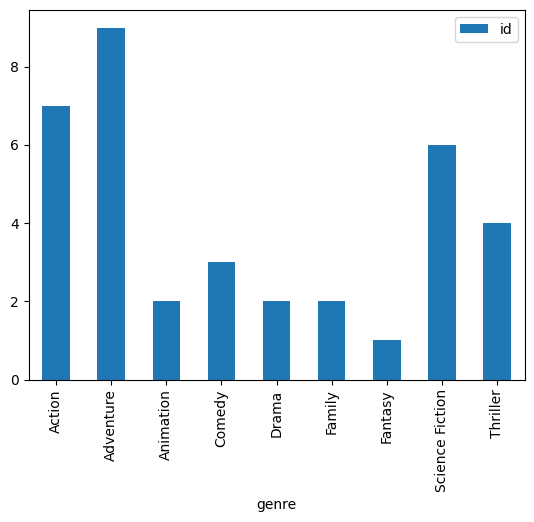

In [79]:
# Plot a bar chart of the genre_count
import matplotlib.pyplot as plt
genre_count.plot(kind='bar')
plt.show()

*Outer Join*

An outer join will return all of the rows from both tables regardless if there is a match between the tables.

<img src="../img/outer-join.jpg" width="300">

***Using outer join to select actors***

# Advanced Merging and Concatenating

# Merging Ordered and Time-Series Data